In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
#from sklearn.linear_model import LinearRegression

Pull data

Filter out 2014. There was an error that year in data collection.

In [25]:
pd.read_csv('combined_farm_precip.csv').head(1)

,state,year,Value of crop production,Crop cash receipts,Cotton,Feed crops,Food grains,Fruits and nuts,Oil crops,Vegetables and melons,All other crops,Home consumption,Inventory adjustment,yearly_avg
0,1,1949,250813,230275,150706.0,13405.0,231.0,4937.0,30196.0,14421.0,16238,39680,-19142,1.18625


In [ ]:
# df_90 = df[df["yearly_avg"] < -50]
# df_90


df = pd.read_csv('combined_farm_precip.csv')
col_name = "yearly_avg"
threshold = -50

def remove_outliers(df, col_name, threshold, lower = True):
    if lower:
        df = df[df[col_name] > threshold]
        return df
    else:
        df = df[df[col_name] < threshold]
        return df
    
df = remove_outliers(df, col_name, threshold, lower = True)

#df["state"] = pd.Categorical(df["state"], categories=state_order, ordered=False)

In [66]:
#df[df["Value of crop production"].isna()]

In [90]:


print("Correlation between yearly_avg and income_stand:")
print(df["yearly_avg"].corr(df["Value of crop production"]))

print("Correlation between year and Value of crop production:")
print(df["year"].corr(df["Value of crop production"]))


Correlation between yearly_avg and income_stand:
0.05257982662966216
Correlation between year and Value of crop production:
0.3911324081866795


In [ ]:
# col_name = "yearly_avg"
# col_group = "state"
# col_stand_name = "income_stand"

# def standardize_column(df, col_name, col_group, col_stand_name):
#     mean_state_col = df.groupby(col_group)[col_name].transform('mean')
#     std_state_col = df.groupby(col_group)[col_name].transform('std')
#     df[col_stand_name] = (df[col_name] - mean_state_col) / std_state_col
#     return df

# df = standardize_column(df, col_name, col_group, col_stand_name)


In [97]:
col_name = "yearly_avg"
col_group = ["state"]
col_stand_name = "income_centered"

def center_column(df, col_name, col_group, col_stand_name):
    mean_state_col = df.groupby(col_group)[col_name].transform('mean')
    df[col_stand_name] = (df[col_name] - mean_state_col)
    return df

df = center_column(df, col_name, col_group, col_stand_name)

In [ ]:
def corr_and_plot(df, colx, coly, plot_file,n_digits):
    correlation = round(df[colx].corr(df[coly]),n_digits)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df[colx], df[coly])
    plt.title(f'Scatter plot of {colx} vs {coly}, Correlation: {correlation}')
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.show()
    plt.savefig(plot_file)

    return correlation

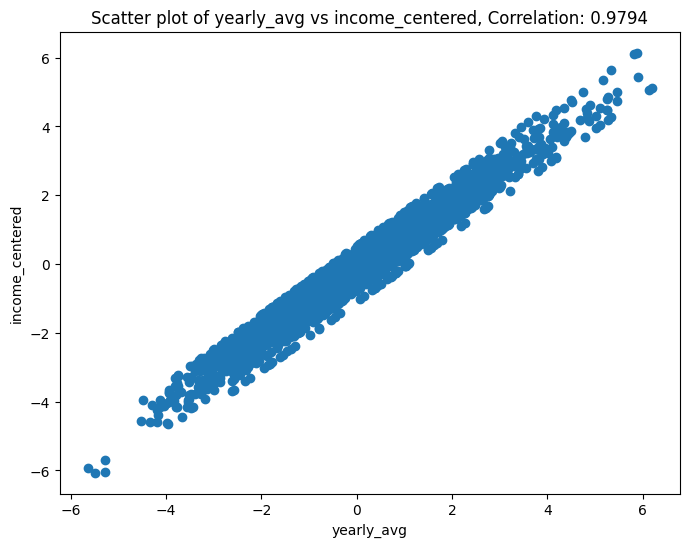

<Figure size 640x480 with 0 Axes>

In [95]:
colx = "yearly_avg"
coly = "income_centered"
plot_file = f"plot_{colx}_vs_{coly}.png"
n_digits = 4

correlation = corr_and_plot(df, colx, coly, plot_file,n_digits)


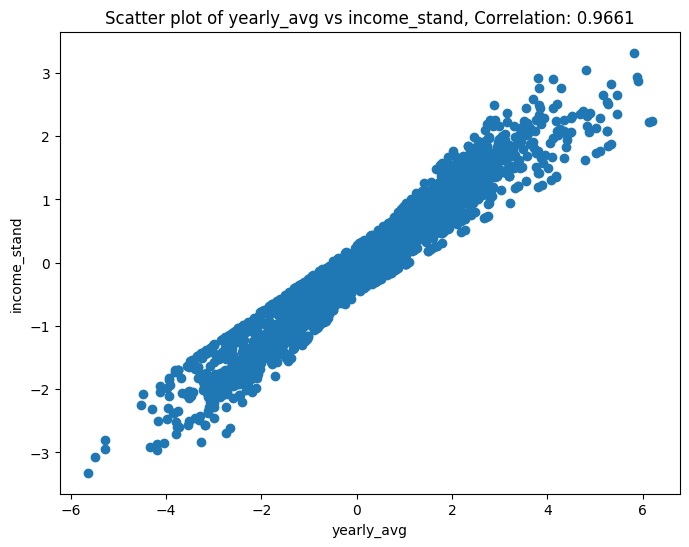

<Figure size 640x480 with 0 Axes>

In [83]:
colx = "yearly_avg"
coly = "income_stand"
plot_file = f"plot_{colx}_vs_{coly}.png"
n_digits = 4

correlation = corr_and_plot(df, colx, coly, plot_file,n_digits)


In [84]:
# plt.hist(df["income_stand"], bins=30)
# plt.show()

# plt.plot(df["yearly_avg"],df["Value of crop production"],'o')
# plt.show()

# plt.plot(df["year"],df["Value of crop production"],'o')
# plt.show()

# plt.plot(df["yearly_avg"],df["income_stand"],'o')
# plt.show()

In [41]:
df["yearly_avg"].corr(df["income_stand"])

np.float64(0.9661142129178085)

In [87]:
def make_scatter_w_cat(df, colx, coly, colcat, plot_file):
    cat_order = sorted(df[colcat].unique())
    palette = sns.color_palette("husl", len(cat_order))

    sns.scatterplot(
    data=df,
    x=colx,
    y=coly,
    hue=colcat,
    hue_order=cat_order,
    palette=palette,
    s=30
    )

    leg = plt.legend(title=colcat, bbox_to_anchor=(1.02, 1), 
                     loc="upper left", borderaxespad=0.,
                     ncol = 2)
    for text in leg.get_texts():
        text.set_fontsize(8)  # smaller labels

    plt.show()
    plt.savefig(plot_file)




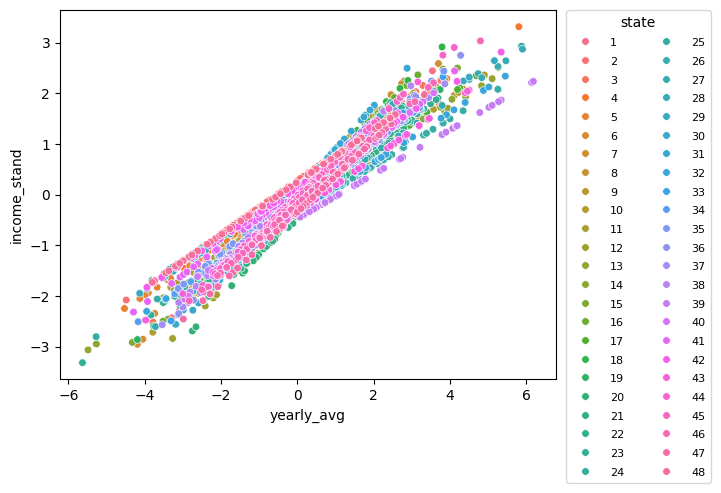

<Figure size 640x480 with 0 Axes>

In [88]:
colx = "yearly_avg"
coly = "income_stand"
colcat = "state"
plot_file = f"plot_{colx}_vs_{coly}_by_{colcat}.png"

make_scatter_w_cat(df, colx, coly, colcat, plot_file)

In [64]:
#df.drop(["income_stand","Value of crop production"], axis=1).head()
# df["year_numeric"] = df["year"].astype(int)
# df_enc = pd.get_dummies(df[["state", "year_numeric","yearly_avg"]], columns=["state"], drop_first=True, dtype=float)
# df_enc = sm.add_constant(df_enc)
# model = sm.OLS(df["income_stand"], df_enc).fit()
# print(model.summary())

# summary_df = pd.DataFrame({
#     "term": model.params.index,
#     "estimate": model.params.values,
#     "std_error": model.bse.values,
#     "t_value": model.tvalues.values,
#     "p_value": model.pvalues.values,
#     "ci_low": model.conf_int()[0].values,
#     "ci_high": model.conf_int()[1].values,
# })

# summary_df.to_csv("farm_regression_summary.csv", index=False)

                            OLS Regression Results                            
Dep. Variable:           income_stand   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2263.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:23:31   Log-Likelihood:                 1235.4
No. Observations:                3120   AIC:                            -2371.
Df Residuals:                    3070   BIC:                            -2069.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1897      0.315     -0.602   

In [ ]:
# farm_mdl = LinearRegression().fit(
#     df_enc,
#     df["income_stand"]
# )


# print("R²:", farm_mdl.score(df_enc, df["income_stand"]))
# print("Coefficients:", farm_mdl.coef_)
# print("Intercept:", farm_mdl.intercept_)



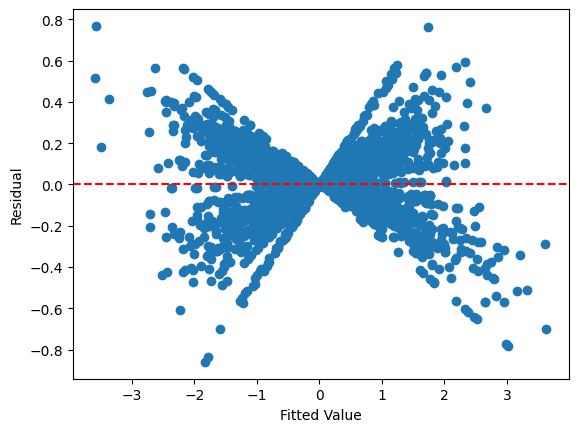

In [65]:
# fitted = model.fittedvalues
# resid = model.resid
# #n = mpg.shape[0]

# plt.scatter(fitted, resid)
# plt.xlabel('Fitted Value')
# plt.ylabel('Residual')
# plt.axhline(y = 0, color = 'red', linestyle = '--')